In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import statsmodels.api as sm

In [75]:
from sklearn.datasets import load_boston

boston_data = load_boston()

In [76]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [77]:
print(boston_data.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [78]:
columns = ['crime rate', 'residential land zone', 'business acres',
           'charles river', 'nitric oxides', 'number of rooms',
           'age', 'distance toemployment centres',
           'accessibility to high', 'property tax',
           'pupil teacher ratio', 'lower income level',
           'median home value'
          ]

In [79]:
boston_data = pd.DataFrame(data = boston_data.data, columns = columns)

In [18]:
boston_data.to_csv('dataset/boston_housing_data.csv', index = False)

In [80]:
boston_df = boston_data
boston_df.head()

,crime rate,residential land zone,business acres,charles river,nitric oxides,number of rooms,age,distance toemployment centres,accessibility to high,property tax,pupil teacher ratio,lower income level,median home value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
boston_df.shape

(506, 13)

In [82]:
FEATURES = list(boston_df.columns[:-1])
FEATURES

['crime rate',
 'residential land zone',
 'business acres',
 'charles river',
 'nitric oxides',
 'number of rooms',
 'age',
 'distance toemployment centres',
 'accessibility to high',
 'property tax',
 'pupil teacher ratio',
 'lower income level']

In [83]:
from sklearn.decomposition import PCA

def apply_pca(x, n, add_constant = False):
    
    pca = PCA(n_components = n)
    x_new = pca.fit_transform(x)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)
        
    return pca, pd.DataFrame(x_new)

In [84]:
pca, _ = apply_pca(boston_df[FEATURES], 5)

In [85]:
print('Explained Variance: ', pca.explained_variance_ratio_)

Explained Variance:  [0.80647232 0.16326376 0.02119902 0.00695327 0.00126736]


In [86]:
def build_model(regression_fn, target, features, dataset, *hyperparameters):
    
    x = dataset[features]
    y = dataset[target]
    
    _, x_new = apply_pca(x, *hyperparameters)
    
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2)
    
    model = regression_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    return {'x initial' : x,
            'x transform' : x_new,
            'x_train' : x_train,
            'x_test' : x_test,
            'y_train' : y_train,
            'y_test' : y_test,
            'y_pred' : y_pred,
            'model': model
     }

In [87]:
def ols_reg(x_train, y_train):
    ols = sm.OLS(y_train, x_train)
    model = ols.fit()
    
    return model

In [88]:
def linear_reg(x_train, y_train):
    model = LinearRegression().fit(x_train, y_train)
    
    return model

In [89]:
model_params = {}

In [90]:
model_params['statsmodel reg'] = build_model(ols_reg, 'median home value', FEATURES, boston_df, 5, True)

In [91]:
model = model_params['statsmodel reg']['model']
x_initial = model_params['statsmodel reg']['x initial']
x_transform = model_params['statsmodel reg']['x transform']
x_train = model_params['statsmodel reg']['x_train']
x_test = model_params['statsmodel reg']['x_test']
y_train = model_params['statsmodel reg']['y_train']
y_test = model_params['statsmodel reg']['y_test']
y_pred = model_params['statsmodel reg']['y_pred']

In [93]:
x_initial.shape

(506, 12)

Text(0, 0.5, 'Residential Land Zone')

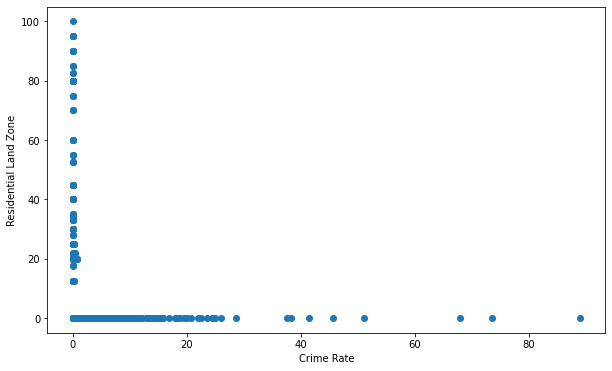

In [94]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.scatter(x_initial['crime rate'], x_initial['residential land zone'], cmap = 'Spectral')

plt.xlabel('Crime Rate')
plt.ylabel('Residential Land Zone')

Text(0, 0.5, 'Principal Component 2')

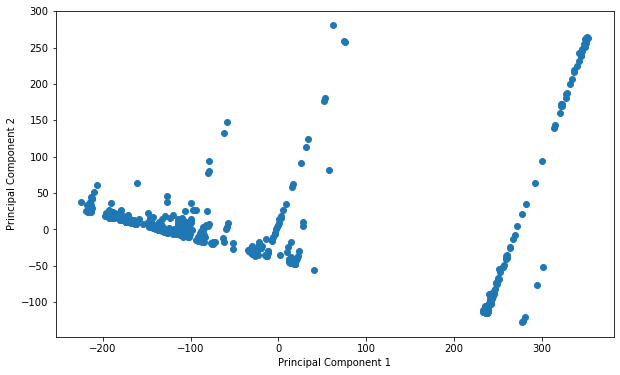

In [96]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.scatter(x_transform[1], x_transform[2], cmap = 'Spectral')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [97]:
print('Rsquared: ', model.rsquared)
print('Adj Rsquared', model.rsquared_adj)

Rsquared:  0.49191054776296905
Adj Rsquared 0.48552751444340836


In [98]:
model_params['Sklearn reg'] = build_model(linear_reg, 'median home value', FEATURES, boston_df, 5, True)

In [99]:
model = model_params['Sklearn reg']['model']
x_initial = model_params['Sklearn reg']['x initial']
x_transform = model_params['Sklearn reg']['x transform']
x_train = model_params['Sklearn reg']['x_train']
x_test = model_params['Sklearn reg']['x_test']
y_train = model_params['Sklearn reg']['y_train']
y_test = model_params['Sklearn reg']['y_test']
y_pred = model_params['Sklearn reg']['y_pred']

In [101]:
print('Rsquared: ', model.score(x_train, y_train))
print('Adj Rsquared', r2_score(y_test, y_pred))

Rsquared:  0.4893386003757809
Adj Rsquared 0.42152023815258666
